In [1]:
import pandas as pd

In [2]:
# Load the dataset
file_path = 'Daily_Public_Transport_Passenger_Journeys_by_Service_Type_20241129.csv'
data = pd.read_csv(file_path)

# Display basic information
print("Dataset Info:")
data.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1918 entries, 0 to 1917
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          1918 non-null   object 
 1   Local Route   1918 non-null   int64  
 2   Light Rail    1918 non-null   int64  
 3   Peak Service  1918 non-null   int64  
 4   Rapid Route   1918 non-null   int64  
 5   School        1918 non-null   int64  
 6   Other         1898 non-null   float64
dtypes: float64(1), int64(5), object(1)
memory usage: 105.0+ KB


In [3]:
print("\nFirst 5 rows:")
print(data.head())


First 5 rows:
         Date  Local Route  Light Rail  Peak Service  Rapid Route  School  \
0  30/08/2024        16436       10705           225        19026    3925   
1  15/09/2023        15499       10671           267        18421    4519   
2  28/12/2021         1756        2352             0         3775       0   
3  11/01/2023        10536        8347           223        14072       0   
4  11/09/2021          820         612             0         1283       0   

   Other  
0   59.0  
1   61.0  
2   13.0  
3   48.0  
4   11.0  


In [4]:
# Check for missing values in the dataset
missing_values = data.isnull().sum()

print("Missing Values in Each Column:")
print(missing_values)


Missing Values in Each Column:
Date             0
Local Route      0
Light Rail       0
Peak Service     0
Rapid Route      0
School           0
Other           20
dtype: int64


In [5]:
# Fill missing values in 'Other' column with the column's mean
data['Other'].fillna(data['Other'].mean(), inplace=True)

# Verify that there are no missing values left
print("Missing Values After Imputation:")
print(data.isnull().sum())


Missing Values After Imputation:
Date            0
Local Route     0
Light Rail      0
Peak Service    0
Rapid Route     0
School          0
Other           0
dtype: int64


C:\Users\Bhupesh P S\AppData\Local\Temp\ipykernel_9608\3212045083.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Other'].fillna(data['Other'].mean(), inplace=True)


In [9]:
# Check for duplicates and remove if any
print("\nNumber of duplicate rows:", data.duplicated().sum())
data.drop_duplicates(inplace=True)


Number of duplicate rows: 0


In [6]:
data.describe()

,Local Route,Light Rail,Peak Service,Rapid Route,School,Other
count,1918.000000,1918.000000,1918.000000,1918.000000,1918.000000,1918.000000
mean,9891.395203,7195.446298,179.581335,12597.213243,2352.694995,43.390411
std,6120.715714,3345.616428,156.532738,6720.494557,2494.766306,41.528539
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3044.500000,4463.500000,0.000000,6383.000000,0.000000,15.000000
50%,11417.000000,7507.000000,193.000000,13106.500000,567.500000,41.000000
75%,15517.500000,10008.250000,313.750000,17924.750000,4914.000000,67.750000
max,21070.000000,15154.000000,1029.000000,28678.000000,7255.000000,1105.000000


In [7]:
# Convert 'Date' column to datetime format (if not already done)
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')

# Extract useful components from 'Date'
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day
data['Day_of_Week'] = data['Date'].dt.dayofweek  # Monday=0, Sunday=6
data['Is_Weekend'] = data['Day_of_Week'].apply(lambda x: 1 if x >= 5 else 0)

# Verify the changes
print("New columns added:")
print(data[['Year', 'Month', 'Day', 'Day_of_Week', 'Is_Weekend']].head())


New columns added:
   Year  Month  Day  Day_of_Week  Is_Weekend
0  2024      8   30            4           0
1  2023      9   15            4           0
2  2021     12   28            1           0
3  2023      1   11            2           0
4  2021      9   11            5           1


In [8]:
# Create a new feature for total passengers
data['Total_Passengers'] = data[['Local Route', 'Light Rail', 'Peak Service', 
                                 'Rapid Route', 'School', 'Other']].sum(axis=1)

# Verify the changes
print("Preview of Total_Passengers feature:")
print(data[['Local Route', 'Light Rail', 'Peak Service', 
            'Rapid Route', 'School', 'Other', 'Total_Passengers']].head())


Preview of Total_Passengers feature:
   Local Route  Light Rail  Peak Service  Rapid Route  School  Other  \
0        16436       10705           225        19026    3925   59.0   
1        15499       10671           267        18421    4519   61.0   
2         1756        2352             0         3775       0   13.0   
3        10536        8347           223        14072       0   48.0   
4          820         612             0         1283       0   11.0   

   Total_Passengers  
0           50376.0  
1           49438.0  
2            7896.0  
3           33226.0  
4            2726.0  


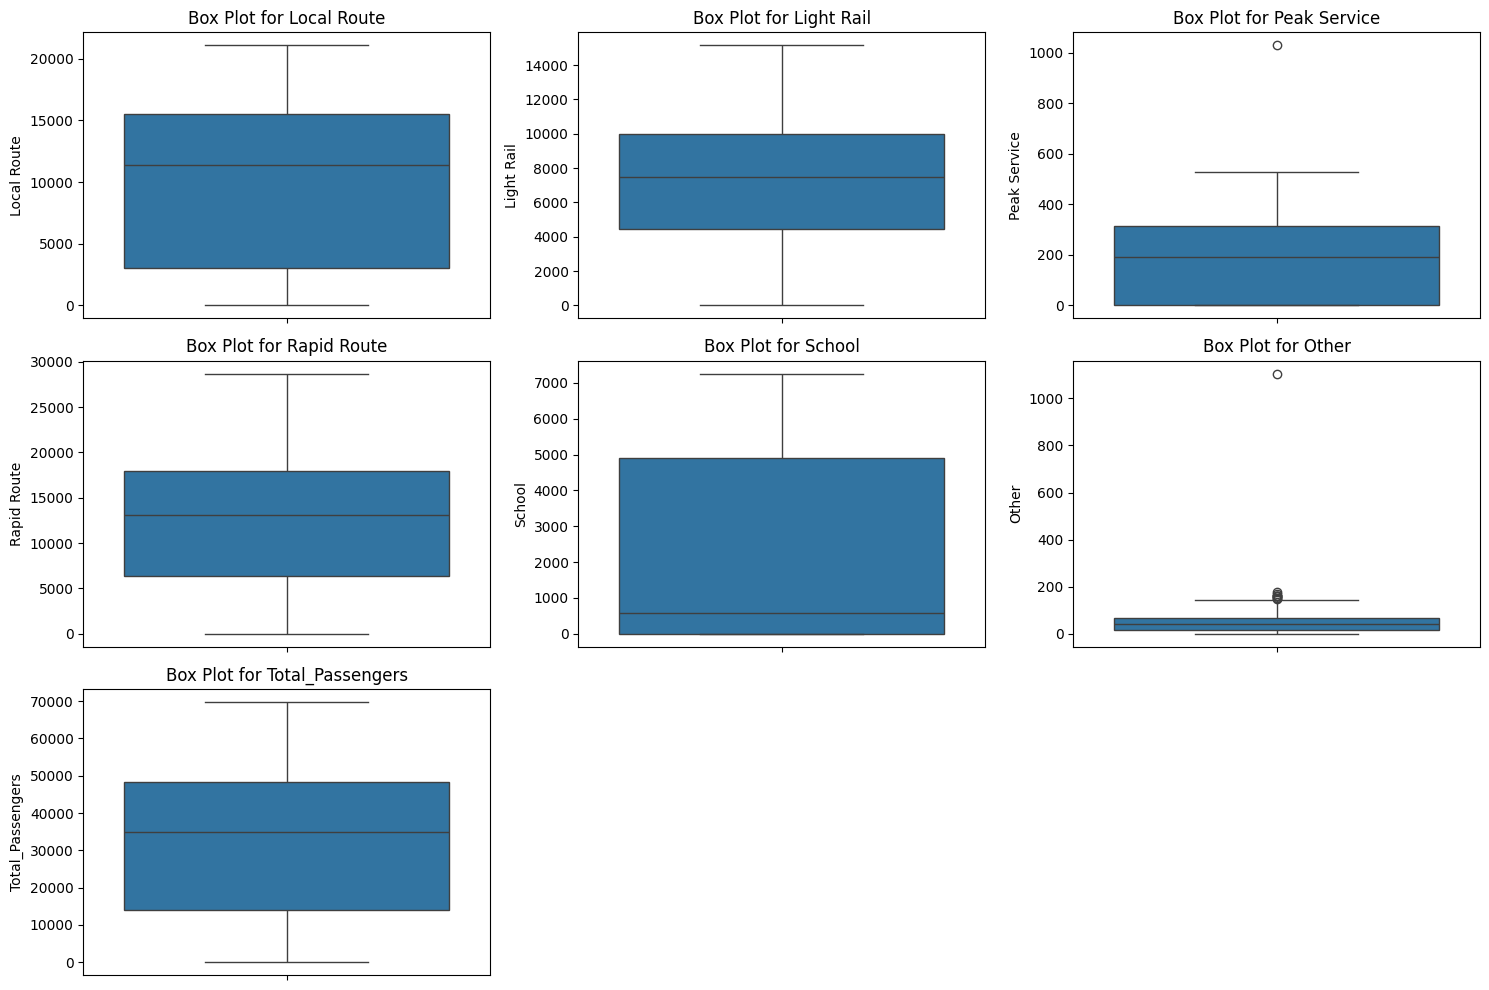

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Columns to visualize for outliers
outlier_columns = ['Local Route', 'Light Rail', 'Peak Service', 'Rapid Route', 'School', 'Other', 'Total_Passengers']

# Create box plots to visualize the outliers in each feature
plt.figure(figsize=(15, 10))

for i, feature in enumerate(outlier_columns, 1):
    plt.subplot(3, 3, i)  # Create a grid of subplots (3x3)
    sns.boxplot(data=data[feature])
    plt.title(f'Box Plot for {feature}')
    plt.tight_layout()

plt.show()


In [12]:
def detect_outliers(df, features):
    outliers = {}
    for feature in features:
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Detect outliers
        outliers[feature] = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)].index.tolist()
    
    return outliers

# Columns to check for outliers
outlier_columns = ['Local Route', 'Light Rail', 'Peak Service', 'Rapid Route', 'School', 'Other', 'Total_Passengers']

# Detect outliers
outliers = detect_outliers(data, outlier_columns)

# Print the outliers detected for each column
print("Outliers detected in the following columns:")
for feature, indices in outliers.items():
    if indices:
        print(f"{feature}: {len(indices)} outliers")

Outliers detected in the following columns:
Peak Service: 1 outliers
Other: 10 outliers


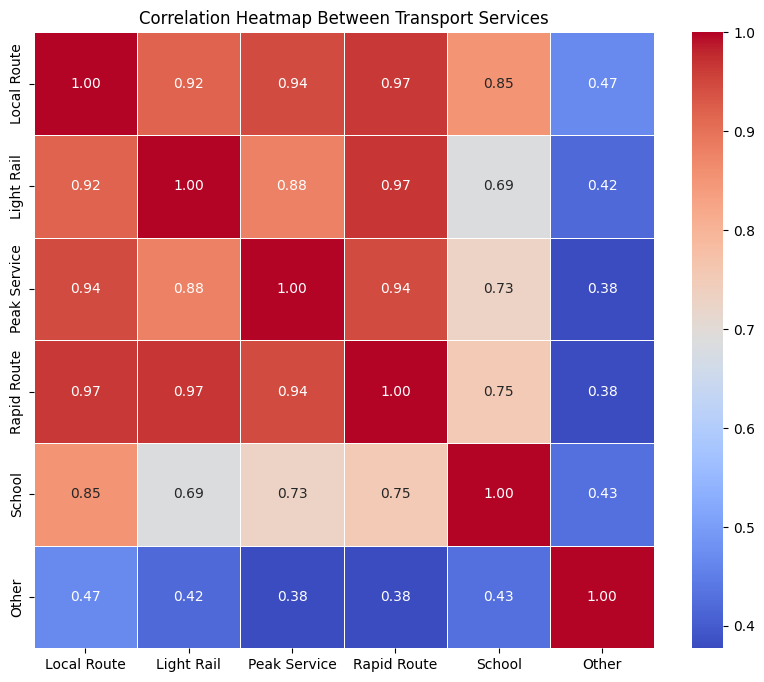

Correlation Matrix:
              Local Route  Light Rail  Peak Service  Rapid Route    School  \
Local Route      1.000000    0.918795      0.944390     0.965122  0.852356   
Light Rail       0.918795    1.000000      0.879347     0.967736  0.685795   
Peak Service     0.944390    0.879347      1.000000     0.944997  0.728795   
Rapid Route      0.965122    0.967736      0.944997     1.000000  0.754290   
School           0.852356    0.685795      0.728795     0.754290  1.000000   
Other            0.468811    0.421139      0.377389     0.378085  0.428731   

                 Other  
Local Route   0.468811  
Light Rail    0.421139  
Peak Service  0.377389  
Rapid Route   0.378085  
School        0.428731  
Other         1.000000  


In [23]:
correlation_matrix = data[['Local Route', 'Light Rail', 'Peak Service', 'Rapid Route', 'School', 'Other']].corr()

# Plot correlation heatmap to understand the relationships between features
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap Between Transport Services')
plt.show()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

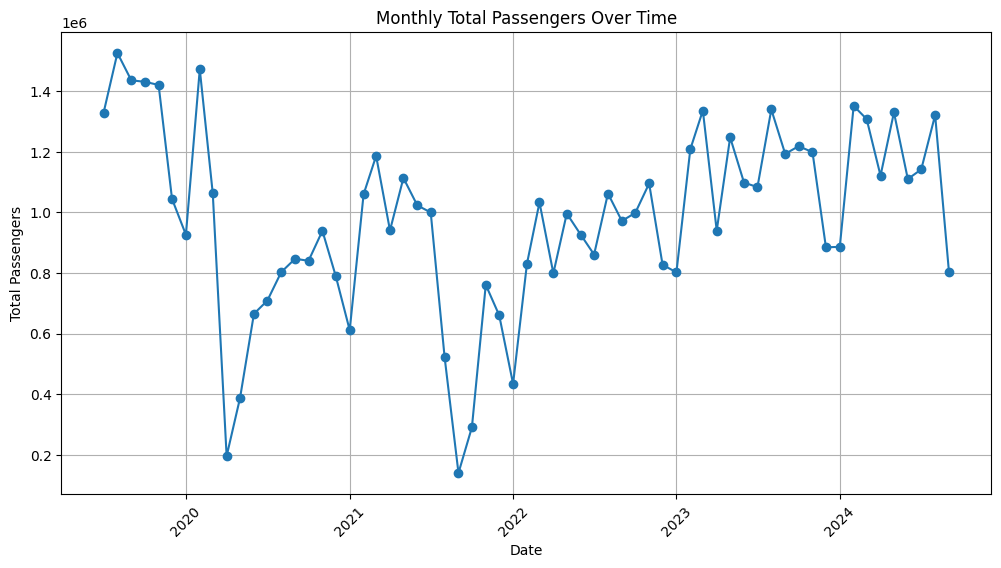

Monthly Aggregated Data (Formatted):
   Year  Month Total_Passengers       Date
0  2019      7        1,327,893 2019-07-01
1  2019      8        1,525,450 2019-08-01
2  2019      9        1,435,190 2019-09-01
3  2019     10        1,430,539 2019-10-01
4  2019     11        1,420,033 2019-11-01


In [20]:
#Aggregating Total Passengers by Year and Month for Trend Analysis
monthly_agg = data.groupby(['Year', 'Month'])['Total_Passengers'].sum().reset_index()
monthly_agg['Date'] = pd.to_datetime(monthly_agg[['Year', 'Month']].assign(DAY=1))

# Plot to visualize the trend over time
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(monthly_agg['Date'], monthly_agg['Total_Passengers'], marker='o')
plt.title('Monthly Total Passengers Over Time')
plt.xlabel('Date')
plt.ylabel('Total Passengers')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

# Format the Total_Passengers column to display numbers with commas for easier readability
monthly_agg['Total_Passengers'] = monthly_agg['Total_Passengers'].apply(lambda x: '{:,.0f}'.format(x))

# Display the formatted monthly aggregated data
print("Monthly Aggregated Data (Formatted):")
print(monthly_agg.head())

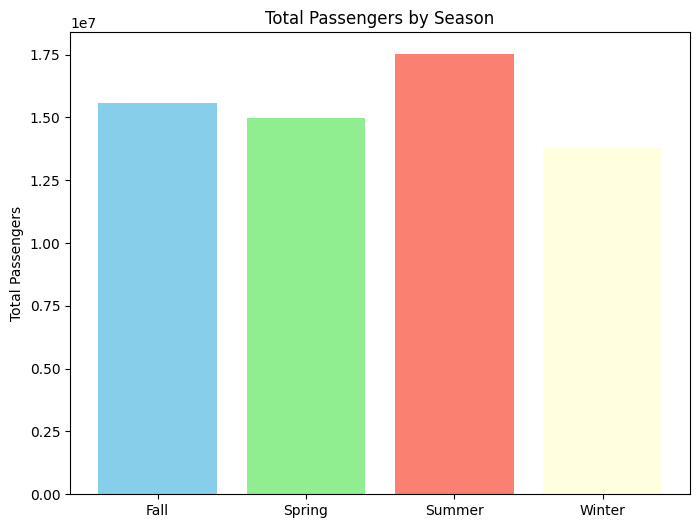

Seasonal Passenger Data:
   Season Total_Passengers
0    Fall       15,579,102
1  Spring       14,993,851
2  Summer       17,516,598
3  Winter       13,784,595


In [18]:
#Seasonal Analysis: Create a feature for 'Season' based on month
season_map = {1: 'Winter', 2: 'Winter', 3: 'Spring', 4: 'Spring', 5: 'Spring', 6: 'Summer',
              7: 'Summer', 8: 'Summer', 9: 'Fall', 10: 'Fall', 11: 'Fall', 12: 'Winter'}
data['Season'] = data['Month'].map(season_map)

# Aggregated total passengers by season
season_agg = data.groupby('Season')['Total_Passengers'].sum().reset_index()

# Plot to visualize passenger distribution across seasons
plt.figure(figsize=(8, 6))
plt.bar(season_agg['Season'], season_agg['Total_Passengers'], color=['skyblue', 'lightgreen', 'salmon', 'lightyellow'])
plt.title('Total Passengers by Season')
plt.ylabel('Total Passengers')
plt.show()

# Display season-wise aggregated passenger data
season_agg['Total_Passengers'] = season_agg['Total_Passengers'].apply(lambda x: '{:,.0f}'.format(x))
print("Seasonal Passenger Data:")
print(season_agg)

In [22]:
#Identifying peak months: Month with maximum total passengers
peak_month = monthly_agg.loc[monthly_agg['Total_Passengers'].idxmax()]
print(f"The peak month for passenger traffic is {peak_month['Date'].strftime('%B %Y')} with {peak_month['Total_Passengers']} passengers.")

The peak month for passenger traffic is July 2021 with 999,500 passengers.


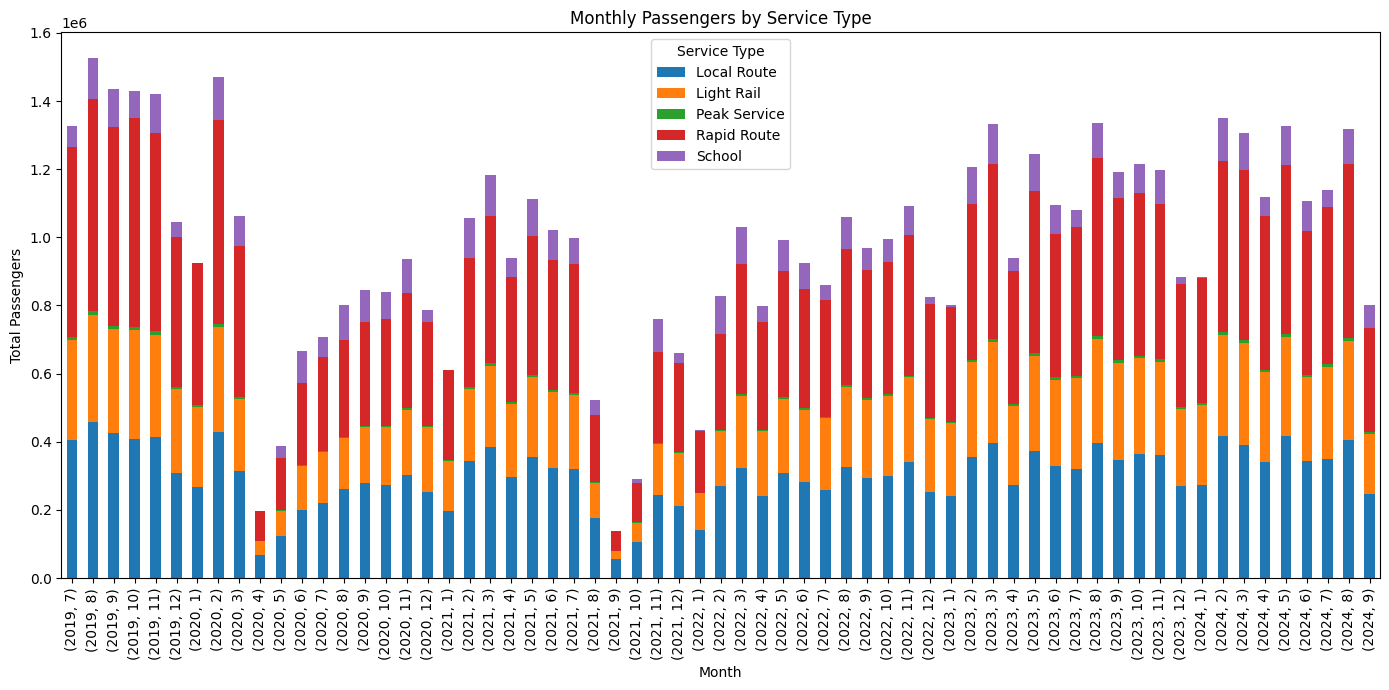

In [25]:
# Grouping the data by Year and Month, and then summing the passengers per service type
monthly_services_agg = data.groupby(['Year', 'Month']).agg({
    'Local Route': 'sum',
    'Light Rail': 'sum',
    'Peak Service': 'sum',
    'Rapid Route': 'sum',
    'School': 'sum'
}).reset_index()

# Create a stacked bar plot
monthly_services_agg.set_index(['Year', 'Month']).plot(kind='bar', stacked=True, figsize=(14, 7))
plt.title('Monthly Passengers by Service Type')
plt.xlabel('Month')
plt.ylabel('Total Passengers')
plt.legend(title='Service Type')
plt.tight_layout()
plt.show()


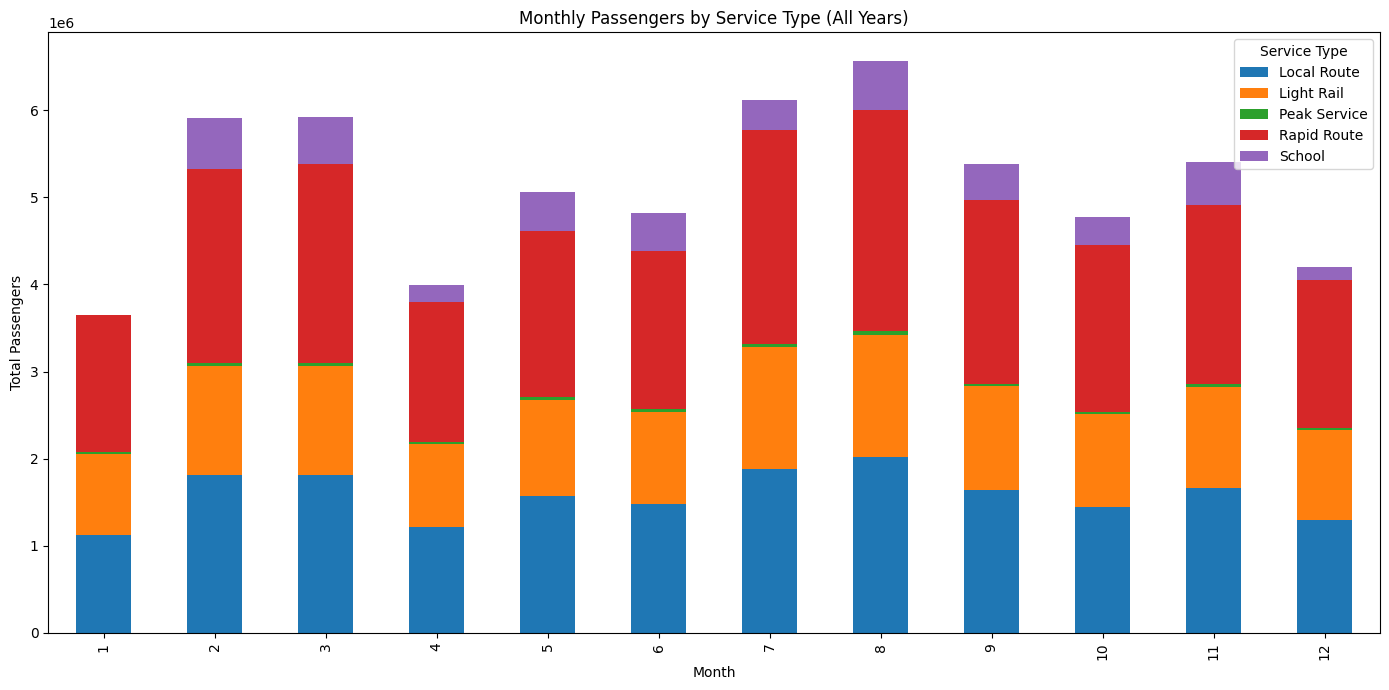

In [26]:
# Group the data by Month and sum the passengers for each service type
monthly_services_agg = data.groupby('Month').agg({
    'Local Route': 'sum',
    'Light Rail': 'sum',
    'Peak Service': 'sum',
    'Rapid Route': 'sum',
    'School': 'sum'
}).reset_index()

# Create a stacked bar plot
monthly_services_agg.set_index('Month').plot(kind='bar', stacked=True, figsize=(14, 7))
plt.title('Monthly Passengers by Service Type (All Years)')
plt.xlabel('Month')
plt.ylabel('Total Passengers')
plt.legend(title='Service Type')
plt.tight_layout()
plt.show()


**INSIGHTS**
1. Interconnected Demand Across Services:
   - Services like Local Route, Light Rail, and Rapid Route show strong correlations, indicating that demand changes in one service often affect others. 
   - This suggests that joint scheduling or resource optimization can be beneficial for these interconnected services.

2. Seasonal Effects on Specific Services:
   - Certain services, such as Rapid Routes, experience higher demand during peak seasons (e.g., summer), driven by tourism.
   - Identifying which service types spike most during each season helps optimize resource allocation for seasonal demand.

3. Recovering from Disruptions:
   - Demand dropped significantly in 2020 and 2022 due to external disruptions (e.g., COVID-19), but services like Rapid Routes recovered faster.
   - This insight can help identify services that are more resilient and plan for future disruptions.

4. Unique Role of "Other" Services:
   - "Other" services (e.g., shuttles) are less correlated with main services, indicating distinct passenger needs or usage patterns.
   - This suggests the need for separate strategies to improve their usage or better align them with the main services.

5. Inefficiencies in "Other" Service Utilization:
   - Weak correlation with core services suggests "Other" services may be underutilized or inefficient.
   - Investigating the reasons for low correlation can help optimize routes, schedules, and overall service utilization.
